# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient develops coronary heart disease (CHD) within a 10-year period.The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

You can read more about the data and the variables [here](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression).

In [1]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [2]:
df = pd.read_csv('framingham.csv').dropna()

# Code below to display first 5 rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the official assignment solution.

In [3]:
# Question 2 code here.
X = df[['totChol']]
y = df['TenYearCHD']

# Splitting code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.5, random_state = 0)

## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**Yes, LogisticRegression applies a default penalty of L2 - this is a ridge penalty that takes the sum of absolute squared value of $\beta$.** 
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**Applying a penalty affects the coefficients as it decreases them towards zero. This penalty affects large coefficients inorder to minimize the model.** 
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**If using the default LogisticRegression settings, there is no need to create a column of 1s in the design matrix. This is because the model already includes an intercept term.** 

## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.

Using this object, **run a logisitic regression analysis** of `TenYearCHD` (y-variable) against `totChol` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `totChol` and `TenYearCHD` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `totChol`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `totChol`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

In [4]:
# creating a logistic regression
log_reg = LogisticRegression(penalty = 'none')

df_LogReg = log_reg.fit(Xtrain, ytrain)
print(f"Intercept {df_LogReg.intercept_} \n Coefficients: {df_LogReg.coef_}")

Intercept [-3.00731819] 
 Coefficients: [[0.00519351]]


In [5]:
yhat_prob = df_LogReg.predict_proba(Xtest)[:,1]
yhat_prob

array([0.11706209, 0.1415564 , 0.14603197, ..., 0.14996098, 0.12765278,
       0.14996098])

In [6]:
# Question 4 code here.
# getting predictions
yhat_prob = df_LogReg.predict_proba(Xtest)[:,1]
yhat_label = df_LogReg.predict(Xtest)

# plotting the data
xscatter = Xtest['totChol'].values
yscatter = ytest.values

# generating predictions and predicted probabilities
xline = Xtest['totChol'].values
yline_label = yhat_label
yline_prob = yhat_prob

<AxesSubplot:>

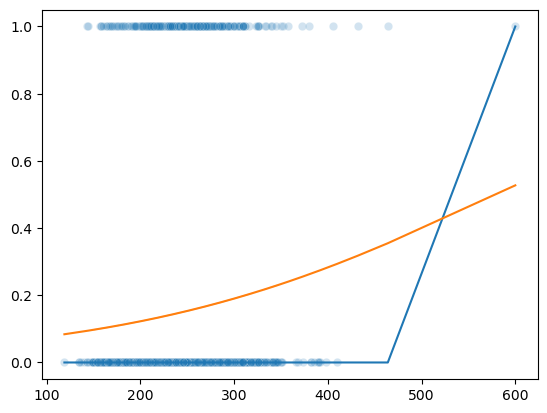

In [7]:
# Plotting code provided
# xscatter, yscatter, xline, yline1, yline2 must all be 1D arrays
ax = sns.scatterplot(x=xscatter,y=yscatter,alpha=0.2) #Plot data
sns.lineplot(x=xline,y=yline_label) # Plot line indicating label
sns.lineplot(x=xline,y=yline_prob) # Plot line indicating probability

## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your totChol-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**This classifier has labeled one instance as positive.** 

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**This classifier labeled this instance as positive because it produced a 52.72% chance of producing a positive label according to the probability outcome of [0.47282914, 0.52717086]** 

* Is this classifier useful for finding specific individuals who will develop CHD? Explain in one or two sentences.

**This model is not helpful at determining individuals who will develop CHD because it is significantly more likely to find people who will not develop CHD.** 

In [8]:
# Calculate performance measures from scratch - provided function
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute whatever else you might need to answer the question.
yline_prob = df_LogReg.predict_proba(Xtest)

yhat = df_LogReg.classes_[(yline_prob[:,1]>0.5).astype(int)]

compute_performance(yhat, ytest, df_LogReg.classes_)   

# finding the only positive label
prob_to_label = pd.DataFrame(yline_prob)
print(prob_to_label.where(prob_to_label[1] >= 0.5).dropna().index)
yline_prob[1426]

tp: 1 tn: 1538 fp: 0 fn: 289
Accuracy: 0.842 Recall: 0.003 Precision: 1.0 Sensitivity: 0.003 Specificity: 1.0
Int64Index([1426], dtype='int64')


array([0.47282914, 0.52717086])

## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `TenYearCHD`) in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Age more strongly associated with CHD, if all other variables are held equal?

**According to this model, if all variables are held equally, then we find age to be less strongly associated with CHD.**

In [9]:
# Code for Question 6
# Splitting code here
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X, y, test_size = 0.5, random_state = 0)

# creating a logistic regression
log_reg = LogisticRegression(penalty = 'none', max_iter= 10000)

df_LogReg_all = log_reg.fit(Xtrain1, ytrain1)
print(f"Intercept {df_LogReg_all.intercept_} \n Coefficients: {df_LogReg_all.coef_}")

Intercept [-8.77704022] 
 Coefficients: [[ 5.03625759e-01  6.23696220e-02 -5.18574252e-03  9.42962272e-02
   1.52682682e-02  5.90443722e-01  9.42082686e-01  1.25446512e-01
  -4.63219078e-01  1.89569699e-03  1.68187113e-02  6.51295675e-05
   1.16060380e-03 -3.79086551e-03  9.79531341e-03]]


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**In this model, 46 test instances are labeled as positive.** 

* Is this classifier **better or worse than the amount-only classifier** for finding individuals likely to develop CHD? Explain in one or two sentences.*

**This classifier is better than the amount-only classfier. An issue with the other classifier is that it labeled the vast majority of the data as negatives, while this model is able to find those positive for developing CHD.** 

In [10]:
# Code for Question 7
y_prob_all = df_LogReg_all.predict_proba(Xtest1)
yhat_all = df_LogReg_all.classes_[(y_prob_all[:,1]>0.5).astype(int)]

compute_performance(yhat_all, ytest1, df_LogReg_all.classes_)   

tp: 24 tn: 1516 fp: 22 fn: 266
Accuracy: 0.842 Recall: 0.083 Precision: 0.522 Sensitivity: 0.083 Specificity: 0.986


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**The classifier that takes into account all the variables has a higher estimated probability of correctly distinguishing between positive and negative instances, we know this from the AUROC. This model has a greater AUROC, suggesting that it has a higher true positive rate than a false positive rate.** 

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**An AUROC that is a worse than random even on its training set may be caused by a classifer that is automatically classifying all instances as negative, or positive.** 


/Users/yunkyaw/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


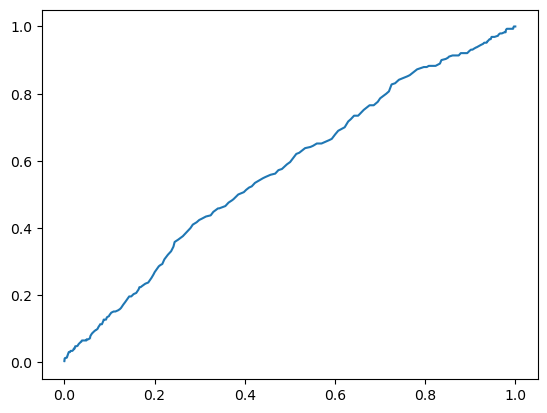

In [11]:
# ROC for totChol-only classifier
ytest_prob = df_LogReg.predict_proba(Xtest)
fpr, tpr, _ = roc_curve(ytest, ytest_prob[:, 1])
ax = sns.lineplot(fpr,tpr)

/Users/yunkyaw/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


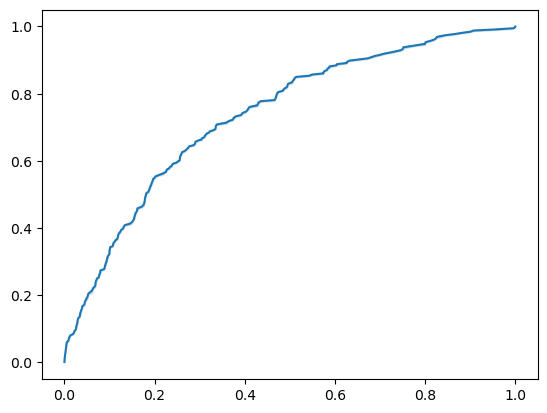

In [12]:
# ROC for all-variable classifier
fpr1, tpr1, _ = roc_curve(ytest1, y_prob_all[:,1])
ax=sns.lineplot(fpr1, tpr1)

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 20% of future CHD cases?

**The classifier that takes into account all variables is better for recovering at least 20% of future CHD cases. This model has a recall of 0.083, and a precision of 0.522, while the other model has a recall of 0.003, and a precision of 1.0.**


Text(0.5, 1.0, 'Precision-Recall Curve')

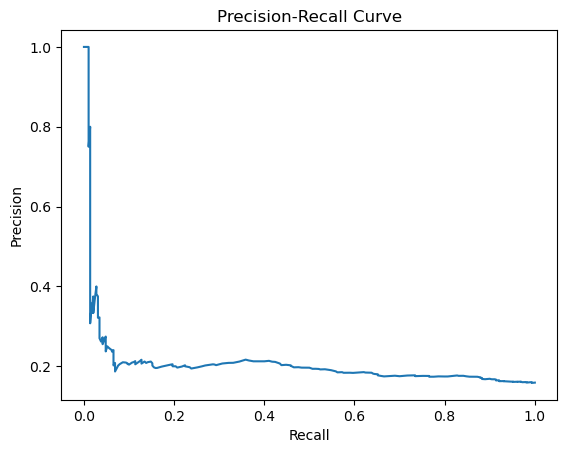

In [13]:
# PRC for totChol-only classifier
precision, recall, thresholds = precision_recall_curve(ytest, ytest_prob[:, 1])
plt.plot(recall, precision)


# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')


Text(0.5, 1.0, 'Precision-Recall Curve')

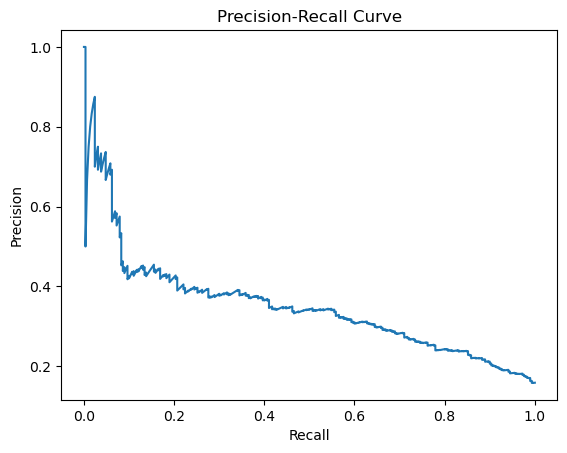

In [14]:
# PRC for all-variable classifier
precision1, recall1, thresholds1 = precision_recall_curve(ytest1, y_prob_all[:,1])

plt.plot(recall1, precision1)

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')